# Colorful


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def svd(X):
    number_of_dimensioons=len(X.shape)
    if number_of_dimensioons==3:
        X=np.transpose(X,(2,0,1))
        U,S,V=np.linalg.svd(X,full_matrices=False)
    else :
        U,S,V=np.linalg.svd(X,full_matrices=False)
        
    return U,S,V

In [3]:
def rebuildsvd(U,S,V,k):
    
    number_of_dimensioons=len(U.shape)
    if number_of_dimensioons==3:
        sigma=np.zeros((3,U.shape[1],V.shape[1]))
        for j in range(3):
            np.fill_diagonal(sigma[j,:k,:],S[j,:k])
        Xrebuild=np.matmul(U,np.matmul(sigma,V))
        Xrebuild=np.transpose(Xrebuild,(0,1,2))
    else :
        Xrebuild = np.matrix(U[:, :k])*np.diag(S[:k])*np.matrix(V[:k , :])
        
    return Xrebuild


In [4]:
def compression_ratio(X,k):
    N=X.shape[0]
    compression_ratio=N/(2*k+1)
    return compression_ratio

In [5]:
def recoverd_variance_proportions(S,k):
    num_of_dim=len(S.shape)
    if num_of_dim == 1 :
        eigenval=S**2/(S.shape[0]-1)
        significance=[np.abs(i)/sum(eigenval) for i in eigenval]
        significance.sort(reverse=True)
        recovered_var=sum(significance[0:k])
    else :
        recovered_var=[]
        for i in range(3):
            current_eigenval=S[i,:]**2/(S.shape[1]-1)
            current_significance=[np.abs(i)/sum(current_eigenval) for i in current_eigenval]
            current_significance.sort(reverse=True)
            current_recovered_var=sum(current_significance[0:k])
            recovered_var.append(current_recovered_var)
    return recovered_var

In [7]:
img=plt.imread('../traf.bmp')

In [8]:

from math import log10
def PSNR(original, compressed):
    diff=(original-compressed)
    mse=np.mean((original-compressed)**2)
    max_pixel=255
    psnr=20*log10(max_pixel/((mse)**(1/2)))
    return psnr
    



In [9]:
import cv2
def tobin(img,k):
    im_gray =cv2.cvtColor(img.astype("uint8"),cv2.COLOR_BGR2GRAY)
   
    (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite(f'bw_img{k}.png', im_bw)

1 is 17.470235957381853
2 is 17.828334048961523
5 is 18.99289104870641
10 is 19.99905395488294
20 is 20.810182643999404
40 is 21.62865326392599
80 is 22.30261886438781
160 is 22.80468102544296
256 is 23.01706359659173
500 is 23.171087726841204
550 is 23.182053594911963
600 is 23.190227159749796


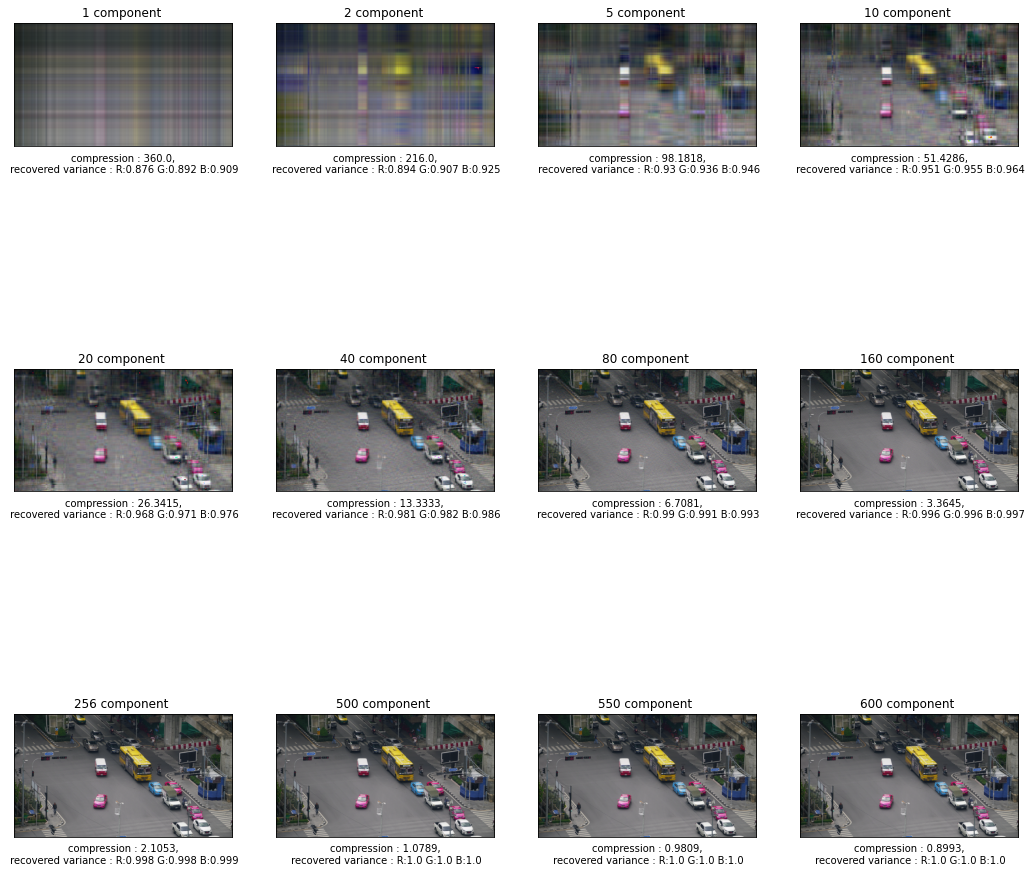

In [10]:
U,S,V = svd(img)
component_num=[1,2,5,10,20,40,80,160,256,500,550,600]
fig=plt.figure(figsize=(18,18))

i=0
for k in component_num:
    img_rebuild=rebuildsvd(U,S,V,k)
    img_rebuild=np.transpose(img_rebuild,(1,2,0))
    c=np.round(compression_ratio(img_rebuild,k),4)
    r=np.round(recoverd_variance_proportions(S,k),3)
    ax=fig.add_subplot(3,4,i+1,xticks=[],yticks=[])
    ax.imshow(img_rebuild.astype(np.uint8))
    
    img_rebuild=cv2.cvtColor(img_rebuild.astype('float32'),cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"img{i}.png",img_rebuild)
    print(f"{k} is {PSNR(img,img_rebuild)}")
    tobin(img_rebuild,k)
    ax.set_title(f"{k} component ")
    ax.set_xlabel(f"compression : {np.round(c,4)},\n recovered variance : R:{r[0]} G:{r[1]} B:{r[2]}")
   
    i=i+1